### Plot the motion of the bunch centroid along the emittance

- For different chromaticity values

In [1]:
import csv
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data folder

b) Load the values of the transverse emittances in lists.

In [3]:
n_turns = int(1e4)            # number of cycles to run the simulation for
decTurns = int(1)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 

#### Convert turns to time [s]

In [4]:
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

In [5]:
wakes = 'ON'

In [6]:
#Qpy_scan = [-2.0, -1.0, 0.0, 1.0, 2.0]
Qpy_scan = [-2, 0, 1, 2]

In [7]:
load_afs = False

In [8]:
if load_afs:
    path_to_data = '/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
    study_name =f'sps_270GeV_noCC_wakesON_sinOffset_div100_removeCO_slices_ayy0_QpxQpy'
else:
    path_to_data = './tbt_data/'

### Load the data

In [9]:
meanX_list, meanY_list = [], []
for Qpy in Qpy_scan:
    print(Qpy)
    if load_afs:
        meanX, meanY = np.loadtxt(path_to_data+f'{study_name}{Qpy}_fixedKicksSet0_run0/file.txt', delimiter = ",", unpack = True)
    else:
        meanX, meanY = np.loadtxt(path_to_data+f'file_Qpy{Qpy}.txt', delimiter = ",", unpack = True)
    meanX_list.append(meanX)
    meanY_list.append(meanY)

-2
0
1
2


In [10]:
emitY_list = []
for Qpy in Qpy_scan:
    if load_afs:
        emitY = pickle.load(open(path_to_data+f'{study_name}{Qpy}_fixedKicksSet0_run0/file_nepsy.pkl', 'rb'))
    else:
        emitY = pickle.load(open(path_to_data+f'file_nepsy_Qpy{Qpy}.pkl', 'rb'))
    emitY_list.append(emitY)

### Plot meanY

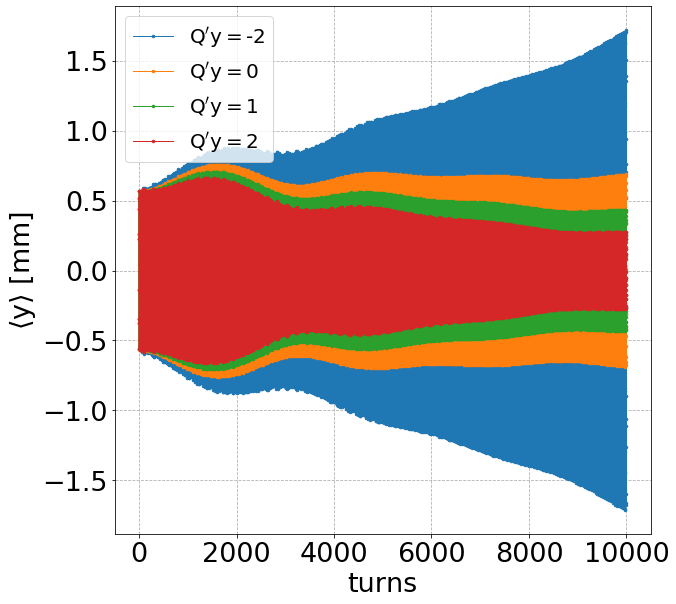

In [11]:
fig, ax = plt.subplots()
for i, Qpy in enumerate(Qpy_scan):
    ax.plot(meanY_list[i]*1e3, '.-', label=r'$\mathrm{Q^\prime y=}$'+f'{Qpy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\langle y \rangle \ [mm]}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/meanY_{study_name}Scan.png', bbox_inches='tight')

### Plot emitY vs slices for a given turn

In [12]:
len(emitY_list[0])

10000

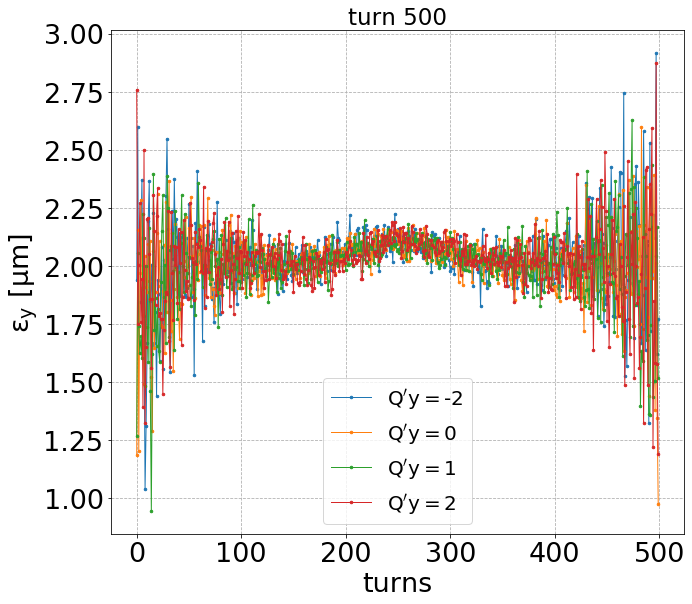

In [13]:
turn = 500
fig, ax = plt.subplots()

for i, Qpy in enumerate(Qpy_scan):
    ax.plot(np.array(emitY_list[i][turn])*1e6, '.-', label=r'$\mathrm{Q^\prime y=}$'+f'{Qpy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\epsilon_y \ [\mu m]}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

plt.title(f'turn {turn}')
plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./output/emitY_{study_name}Scan.png', bbox_inches='tight')

### For each aquisition the average over z is considered. 

- Repeat for every chroma value

In [14]:
mean_emitY = {}

for i, Qpy in enumerate(Qpy_scan):
    mean_emitY[f'Qpy_{Qpy}'] = []
    for turn in range(len(emitY_list[i])): 
        mean_emitY[f'Qpy_{Qpy}'].append(np.mean(emitY_list[i][turn]))

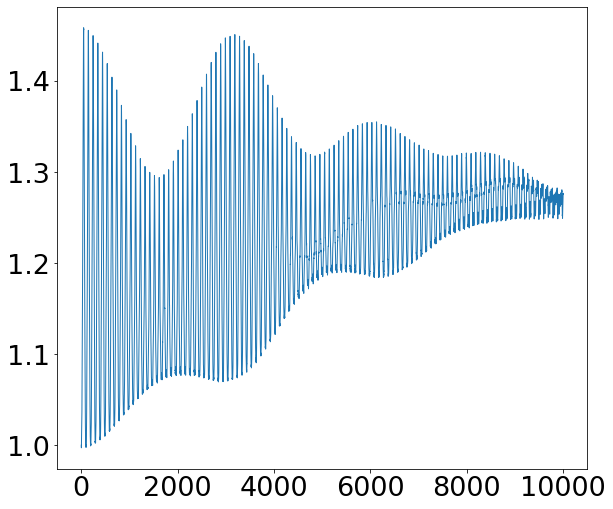

In [17]:
plt.plot( mean_emitY[f'Qpy_{0}']/mean_emitY[f'Qpy_{0}'][0])

### Plot emittance y, for each acquistion the average emiettance over z is considered

In [ ]:
fig, ax = plt.subplots()
for i, Qpy in enumerate(Qpy_scan):
    ax.plot()

### Plot mean X

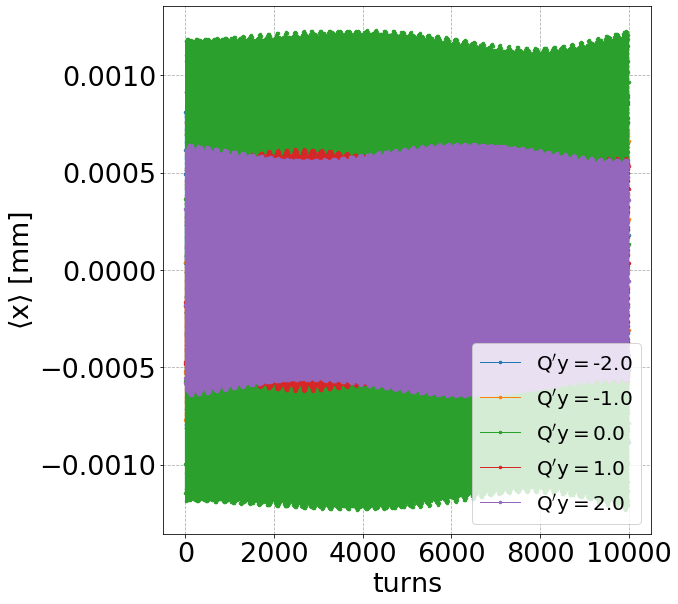

In [15]:
fig, ax = plt.subplots()
for i, Qpy in enumerate(Qpy_scan):
    ax.plot(meanX_list[i]*1e3, '.-', label=r'$\mathrm{Q^\prime y=}$'+f'{Qpy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\langle x \rangle \ [mm]}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/meanX_{study_name}Scan.png', bbox_inches='tight')

### Plot emitX

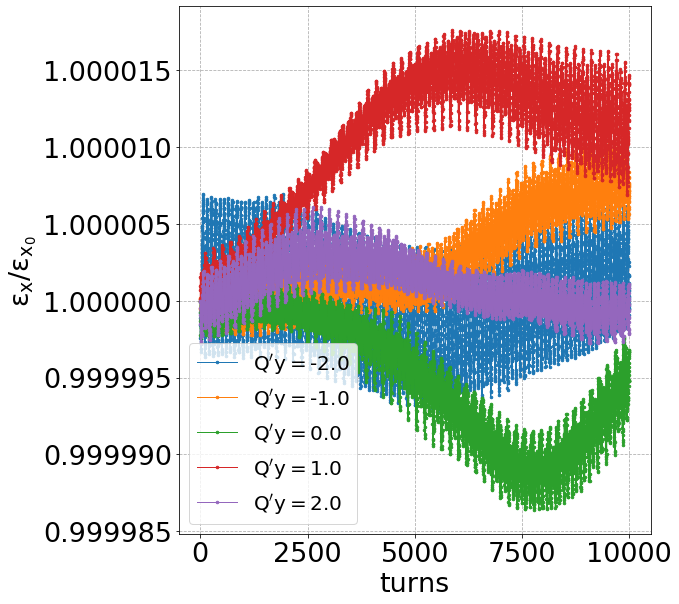

In [16]:
fig, ax = plt.subplots()
for i, Qpy in enumerate(Qpy_scan):
    ax.plot(emitX_list[i]/emitX_list[i][0], '.-', label=r'$\mathrm{Q^\prime y=}$'+f'{Qpy}')
ax.set_xlabel('turns')
ax.set_ylabel(r'$\mathrm{\epsilon_x / \epsilon_{x_0}}$')
ax.grid(linestyle='dashed')
ax.legend(loc=0)

ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useOffset=False)

plt.tight_layout()

savefig = True
if savefig:
    plt.savefig(f'./output/emitX_{study_name}Scan.png', bbox_inches='tight')